In [1]:
import numpy as np
import networkx as nx
from bokeh.io import output_notebook
from bokeh.io import output_file, show, save
from bokeh.plotting import figure, from_networkx
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import collections
from itertools import combinations

In [9]:
def parseData(filepath):
    data = pd.read_csv(filepath)
    graph = nx.Graph()

    nodes = data['username'].unique()

    for node in nodes:
        graph.add_node(node)

    grouped_by_page_and_thread = data.groupby(['page_name', 'thread_subject'])

    for page_and_thread, dataframe in grouped_by_page_and_thread:
        users = dataframe['username'].unique()
        for i in range(len(users)):
            for j in range(i + 1, len(users)):
                graph.add_edge(users[i], users[j])

    return graph
        





### Load Graphs

In [11]:
if __name__ == "__main__":
    filepath = 'datasets/PROPERTIES_FOR_DELETION_SML.csv'
    filepath2 = "datasets/WIKIPROJECTS_MED.csv"
    filepath3 = "datasets/USERS_LRG.csv"

    graph1 = parseData(filepath=filepath)
    graph2 = parseData(filepath=filepath2)
    graph3 = parseData(filepath=filepath3)

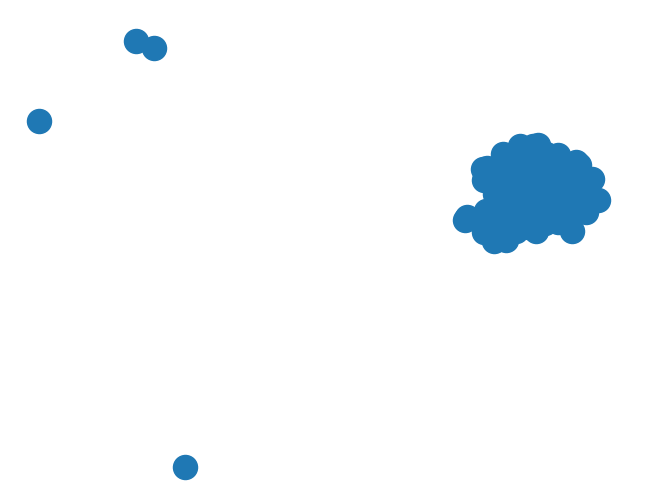

In [15]:
nx.draw(graph1, with_labels = False)
plt.show()

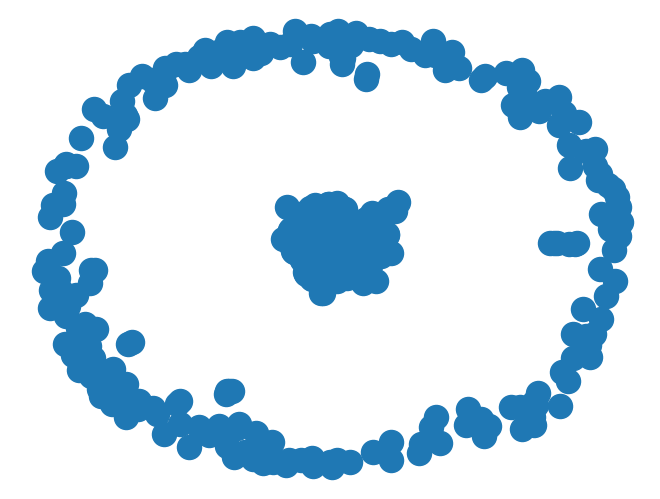

In [16]:
nx.draw(graph2, with_labels = False)
plt.show()

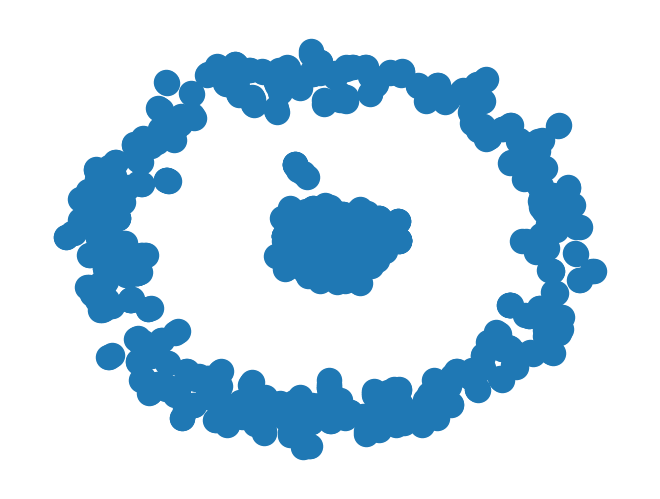

In [3]:
nx.draw(graph3, with_labels = False)
plt.show()

In [3]:
 # If we want to plot the graph = subgraph(largest_component)
def bokeh_plot_simple(graph:nx.Graph, title:str, scale=2, crop_factors = None):
    
    crop_factors = dict(x_range=(-1.1,1.1), y_range=(-1.1,1.1)) \
        if crop_factors is None else crop_factors

    plot = figure(
        title=title, tools="",
        toolbar_location=None, **crop_factors)

    mapping = dict((n, i) for i, n in enumerate(graph.nodes))
    graph_mapped = nx.relabel_nodes(graph, mapping)

    graph_plot = from_networkx(
        graph_mapped, nx.spring_layout, scale=scale, center=(0,0))
    plot.renderers.append(graph_plot)

    #output_file("networkx_graph.html")
    show(plot)

output_notebook()

Loading BokehJS ...

In [19]:
bokeh_plot_simple(graph1, 'Graph 1', 4)

In [20]:
bokeh_plot_simple(graph2, 'Graph 2', 1)

In [6]:
bokeh_plot_simple(graph3, 'Graph 3', 1)

## i) Characteristics

### 1) graph statistics

In [4]:
# i)1) Graph Statistics
def print_graph_statistics(graph:nx.Graph):
    print("Number of nodes: {}\nNumber of edges: {}".format(
        graph.number_of_nodes(), graph.number_of_edges()
    ))
    print("Number of connected components: {}".format(
        nx.algorithms.components.number_connected_components(graph),
    ))
    print("Average degree: {}\nClustering coefficient: {}".format(
        np.mean([deg for _, deg in graph.degree]),
        nx.algorithms.cluster.average_clustering(graph)
    ))

    try:  # attempt to compute the diameter of the graph
        diam = nx.algorithms.approximation.distance_measures.diameter(graph)
        print("Graph diameter: {}".format(diam))
    except:  # an error has  occurred
        print("\nERROR: Could not compute the diameter of the graph.")

In [12]:
print_graph_statistics(graph1)

Number of nodes: 739
Number of edges: 13530
Number of connected components: 4
Average degree: 36.617050067659
Clustering coefficient: 0.7913288282706287

ERROR: Could not compute the diameter of the graph.


In [13]:
print_graph_statistics(graph2)

Number of nodes: 1620
Number of edges: 6782
Number of connected components: 202
Average degree: 8.37283950617284
Clustering coefficient: 0.5041946321408047

ERROR: Could not compute the diameter of the graph.


In [14]:
print_graph_statistics(graph3)

Number of nodes: 11387
Number of edges: 24692
Number of connected components: 3262
Average degree: 4.336875384210064
Clustering coefficient: 0.18271852842828912

ERROR: Could not compute the diameter of the graph.


In [3]:
def get_degree_count_distribution(graph):
    degree_sequence = [d for n, d in graph.degree()]
    degree_count = collections.Counter(degree_sequence)
    deg, cnt = zip(*degree_count.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.8)
    plt.title('Degree Histogram')
    plt.ylabel('Count')
    plt.xlabel('Degree')
    plt.show


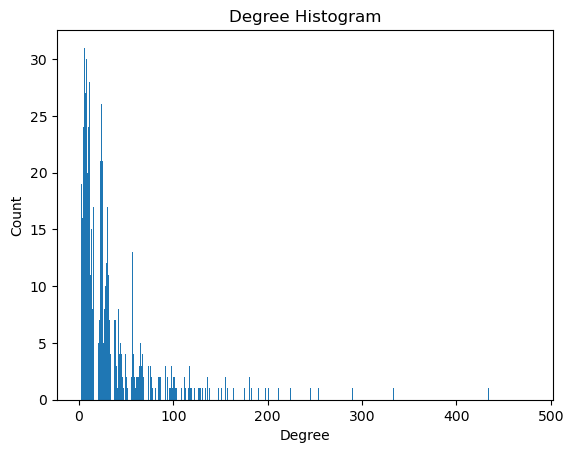

In [27]:
get_degree_count_distribution(graph1)

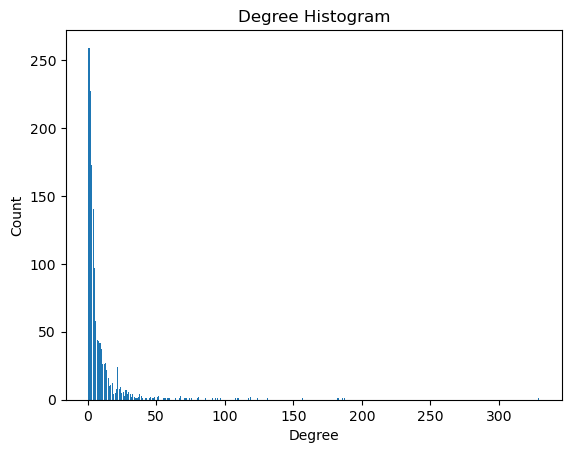

In [28]:
get_degree_count_distribution(graph2)

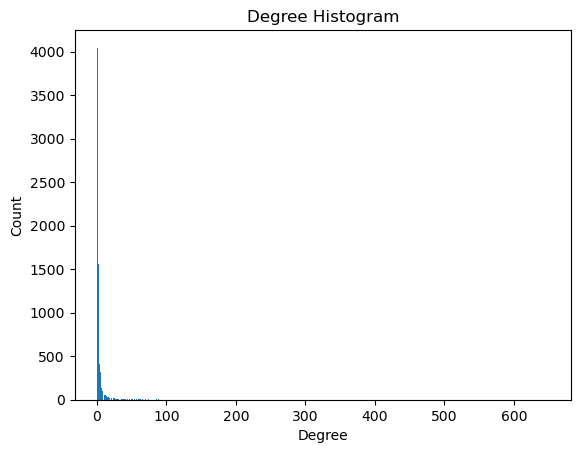

In [10]:
get_degree_count_distribution(graph3)

### 2) high level stats

In [6]:
def print_connected_statistics_with_average_shortest_path(component:nx.Graph):
    print("Number of nodes: {}\nNumber of edges: {}".format(
        component.number_of_nodes(), component.number_of_edges()
    ))
    print("Average path length: {}".format(
    nx.average_shortest_path_length(component)
    ))
    print("Number of connected components: {}".format(
        nx.algorithms.components.number_connected_components(component),
    ))
    print("Average degree: {}\nClustering coefficient: {}".format(
        np.mean([deg for _, deg in component.degree]),
        nx.algorithms.cluster.average_clustering(component)
    ))

    try:  # attempt to compute the diameter of the graph
        diam = nx.algorithms.approximation.distance_measures.diameter(component)
        print("Graph diameter: {}".format(diam))
    except:  # an error has  occurred
        print("\nERROR: Could not compute the diameter of the graph.")

In [7]:
def print_statistics_for_largest_component(graph:nx.Graph):
    largest_component = max(nx.connected_components(graph), key=len)
    graph_largest_components = graph.subgraph(largest_component)
    print_connected_statistics_with_average_shortest_path(graph_largest_components)
    #Could do for all components
    # for i, conn_component in enumerate(
    #     nx.connected_components(graph)):
    #     print(f"[Graph component {i}]")
    #     sub_graph = graph.subgraph(conn_component)  # XXX Careful to manupulations!
    #     print_connected_component_statistics(sub_graph)
    #     print("-"*50 + "\n")

In [32]:
print_statistics_for_largest_component(graph1)

Number of nodes: 735
Number of edges: 13529
Average path length: 2.1468090233368553
Number of connected components: 1
Average degree: 36.81360544217687
Clustering coefficient: 0.7956353797169995
Graph diameter: 4


In [33]:
print_statistics_for_largest_component(graph2)

Number of nodes: 1397
Number of edges: 6755
Average path length: 3.150434927074595
Number of connected components: 1
Average degree: 9.670722977809591
Clustering coefficient: 0.5763268700081867
Graph diameter: 8


In [13]:
print_statistics_for_largest_component(graph3)

Number of nodes: 7767
Number of edges: 24219
Average path length: 3.63558102434937
Number of connected components: 1
Average degree: 6.23638470451912
Clustering coefficient: 0.24408169819487507
Graph diameter: 10


In [8]:
def get_degree_count_distribution_largest_component(graph):
    degree_sequence = [d for n, d in graph.degree()]
    degree_count = collections.Counter(degree_sequence)
    deg, cnt = zip(*degree_count.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.8)
    plt.title('Degree Histogram')
    plt.ylabel('Count')
    plt.xlabel('Degree')
    plt.show

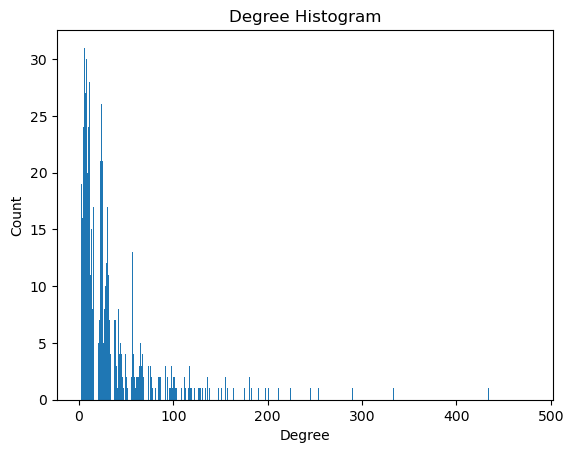

In [36]:
get_degree_count_distribution_largest_component(graph1)

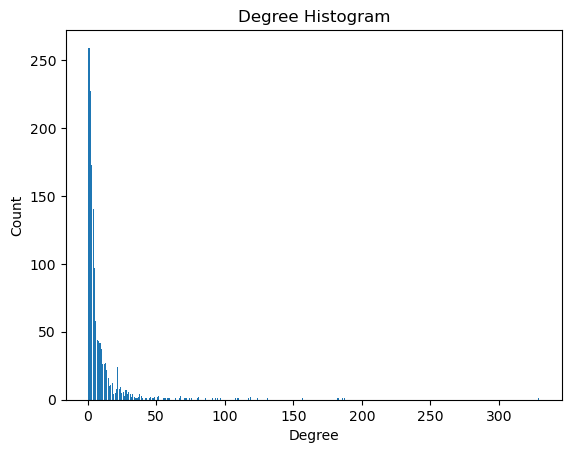

In [37]:
get_degree_count_distribution_largest_component(graph2)

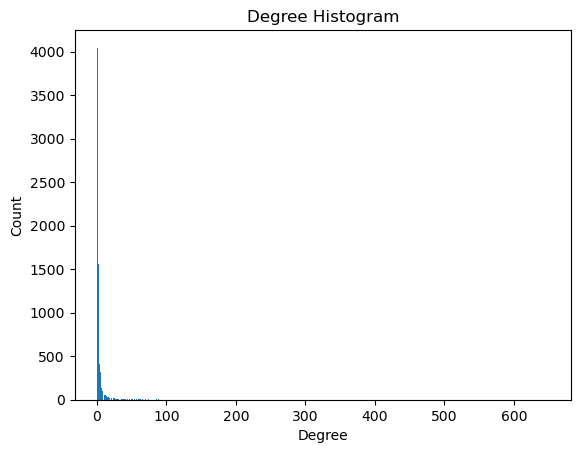

In [15]:
get_degree_count_distribution_largest_component(graph3)

### 3) Node level statistics

In [9]:
def get_node_level_descriptors(graph:nx.Graph):
    degrees = [d for _, d in graph.degree()]
    degree_centrality = [d for _, d in nx.degree_centrality(graph).items()]
    ccoeffs = [d for _, d in nx.algorithms.cluster.clustering(graph).items()]
    ccentra = [d for _, d in nx.closeness_centrality(graph).items()]

    return {'degrees': degrees, 'degree_centrality': degree_centrality, 'clustering coefficients': ccoeffs, 'closenes centrality': ccentra}

In [10]:
def plot_helper_node_level_descriptors(descriptors, titles, key):
    data = {titles[i]: descriptors[i][key] for i in range(len(titles))}
    sns.displot(data, height=4, aspect=2, kde=True)


def show_node_level_descriptors_degrees(graphs=[graph1, graph2, graph3], titles=['graph1', 'graph2', 'graph3']):
    
    descriptors = [get_node_level_descriptors(graph) for graph in graphs]

    print('Degrees')
    plot_helper_node_level_descriptors(descriptors, titles, 'degrees')

def show_node_level_descriptors_clustering_centrality(graphs=[graph1, graph2, graph3], titles=['graph1', 'graph2', 'graph3']):
    
    descriptors = [get_node_level_descriptors(graph) for graph in graphs]

    print('Clustering Coefficient')
    plot_helper_node_level_descriptors(descriptors, titles, 'clustering coefficients')

def show_node_level_descriptors_closeness_centrality(graphs=[graph1, graph2, graph3], titles=['graph1', 'graph2', 'graph3']):
    
    descriptors = [get_node_level_descriptors(graph) for graph in graphs]

    print('Closeness Centrality')
    plot_helper_node_level_descriptors(descriptors, titles, 'closenes centrality')

Degrees


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell

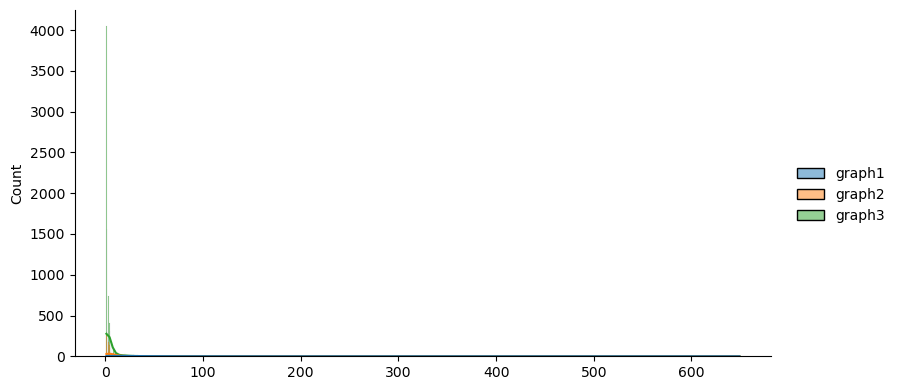

In [18]:

show_node_level_descriptors_degrees()

Clustering Coefficient


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell

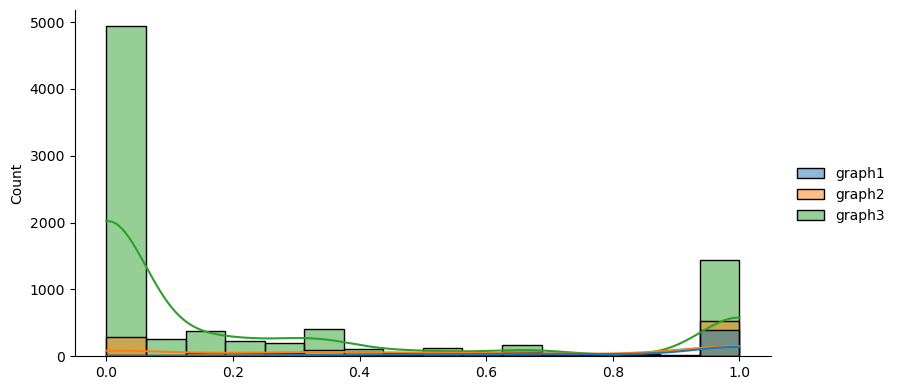

In [19]:
show_node_level_descriptors_clustering_centrality()

Closeness Centrality


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell

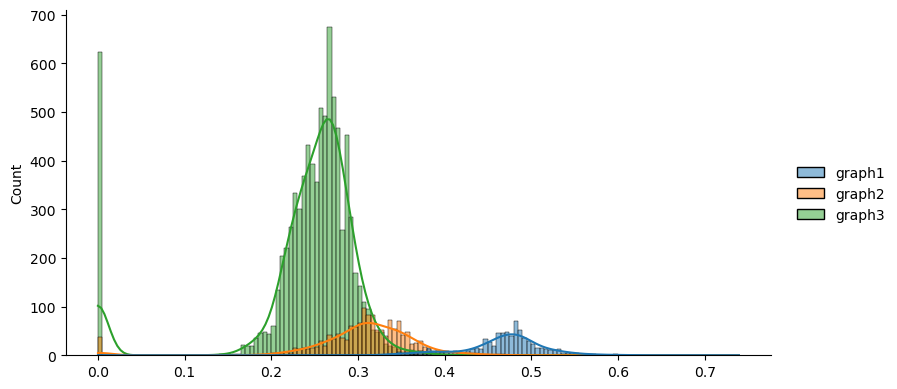

In [20]:
show_node_level_descriptors_closeness_centrality()

## ii) Shortest Paths

In [11]:
# Djikstra
def get_shortest_path_largest_component_Dijkstra(graph:nx.Graph, farthest_nodes:tuple):
    start_node, end_node = farthest_nodes

    spath = nx.algorithms.dijkstra_path(graph, start_node, end_node)
    print("\nShortest path: " + " -> ".join([str(n) for n in spath]))

    print("How long is the path among these farthest nodes? {}".format(
    len(spath) - 1))  # here we do -1 to avoid counting the starting node!
    print(f'Should be the same as the diameter of the graph!!!: {nx.algorithms.approximation.distance_measures.diameter(graph)}')

In [12]:
# BF
def get_shortest_path_largest_component_BF(graph:nx.Graph, farthest_nodes):
    start_node, end_node = farthest_nodes

    print(f"Start node: {start_node}\nEnd node: {end_node}") 

    spath = nx.algorithms.bellman_ford_path(graph, start_node, end_node)
    print("\nShortest path: " + " -> ".join([str(n) for n in spath]))

    print("How long is the path among these farthest nodes? {}".format(
    len(spath) - 1))  # here we do -1 to avoid counting the starting node!
    print(f'Should be the same as the diameter of the graph!!!: {nx.algorithms.approximation.distance_measures.diameter(graph)}')

In [13]:
graph1_largest_component = graph1.subgraph(max(nx.connected_components(graph1), key=len))

graph2_largest_component = graph2.subgraph(max(nx.connected_components(graph2), key=len))

graph3_largest_component = graph3.subgraph(max(nx.connected_components(graph3), key=len))


In [14]:
import sys
import itertools

In [21]:
spinner_chars = itertools.cycle('|/-\\')  # Create a cycle iterator for the spinner


def update_spinner(spinner_chars, percent):
    sys.stdout.write('\r' + 'Loading: ' + next(spinner_chars) + '   ' + str(round(percent, 2)) + '% ')
    sys.stdout.flush()



In [22]:
def get_farthest_nodes(graph):
    max_length = 0
    farthest_nodes = None
    graph_diam = nx.algorithms.approximation.distance_measures.diameter(graph)
    size = len(graph.nodes())
    size *= len(graph.nodes())
    iter = 0

    for possible_start_node in graph.nodes():
        update_spinner(spinner_chars, (iter*100/size))
        for possible_end_node in graph.nodes():
            if possible_start_node != possible_end_node:
                iter += 1
                try:
                    update_spinner(spinner_chars, (iter*100/size))
                    length = nx.shortest_path_length(graph, source = possible_start_node, target=possible_end_node, method='dijkstra')
                    if length > max_length:
                        max_length = length
                        farthest_nodes = (possible_start_node, possible_end_node)
                    elif max_length == graph_diam:
                        update_spinner(spinner_chars, (iter*100/size))
                        return farthest_nodes
                except nx.NetworkXNoPath:
                    continue
                    

    return farthest_nodes

In [26]:
# leveraging the property of the diameter's endpoints being part of the longest shortest path from any node
def get_farthest_nodes_efficient(graph:nx.Graph):
    node = list(graph.nodes())[0]

    distances_from_node = nx.single_source_shortest_path_length(graph, node)
    start_node = max(distances_from_node, key=distances_from_node.get)

    distances_from_start_node = nx.single_source_shortest_path_length(graph, start_node)
    end_node = max(distances_from_start_node, key=distances_from_start_node.get)

    return(start_node, end_node)

In [17]:
def check_diam_is_in_component(graph:nx.Graph, largest_component:nx.Graph):
    try:
        largest_comp_diam = nx.algorithms.approximation.distance_measures.diameter(largest_component)
    except:
        print('This component has no diameter')
        return False

    connected_components = [list(component) for component in nx.connected_components(graph)]
    for comp in connected_components:
        try:  # attempt to compute the diameter of the graph
            diam = nx.algorithms.approximation.distance_measures.diameter(graph)
            if nx.algorithms.approximation.distance_measures.diameter(comp) > largest_comp_diam:
                return False
        except:  # an error has  occurred
            continue
        
    return True



In [19]:
# Check to see if largest path is in largest component
print('Graph 1:')
print(check_diam_is_in_component(graph1, graph1_largest_component))
print('\nGraph 2: ')
print(check_diam_is_in_component(graph2, graph2_largest_component))
print('\nGraph 3:')
print(check_diam_is_in_component(graph3, graph3_largest_component))

Graph 1:
True

Graph 2: 
True

Graph 3:
True


In [19]:
graph1_farthest_nodes = get_farthest_nodes_efficient(graph1_largest_component) # diam = 4

Loading: /   0.01% 

Loading: |   8.34% 

In [22]:
graph2_farthest_nodes  = get_farthest_nodes_efficient(graph2_largest_component) # diam = 8

Loading: /   0.0% 

Loading: -   3.33% 

In [27]:
# we have assumed that the largest path will be in the largest component
graph3_farthest_nodes = get_farthest_nodes_efficient(graph3_largest_component) # diam = 10

In [20]:
get_shortest_path_largest_component_Dijkstra(graph1_largest_component, graph1_farthest_nodes)


Shortest path: Kam Solusar -> Kolja21 -> ChristianKl -> Vogone -> Ch1902
How long is the path among these farthest nodes? 4
Should be the same as the diameter of the graph!!!: 4


In [24]:
get_shortest_path_largest_component_Dijkstra(graph2_largest_component, graph2_farthest_nodes)


Shortest path: Santer -> 콩가루 -> Hym411 -> Multichill -> Andrawaag -> TiagoLubiana -> Gnoeee -> Mayankj429 -> Timbaaa
How long is the path among these farthest nodes? 8
Should be the same as the diameter of the graph!!!: 8


In [28]:
get_shortest_path_largest_component_Dijkstra(graph3_largest_component, graph3_farthest_nodes)


Shortest path: Vitek -> 31.200.11.11 -> 31.200.12.207 -> 31.200.19.61 -> Armineaghayan -> Multichill -> Tobias1984 -> Bodhisattwa -> Bhashyam Tharun Kumar -> Naga sai sravanth -> ESWAR NAGA MAHESH
How long is the path among these farthest nodes? 10
Should be the same as the diameter of the graph!!!: 10


In [21]:
get_shortest_path_largest_component_BF(graph1_largest_component, graph1_farthest_nodes)

Start node: Kam Solusar
End node: Ch1902

Shortest path: Kam Solusar -> Kolja21 -> ChristianKl -> Vogone -> Ch1902
How long is the path among these farthest nodes? 4
Should be the same as the diameter of the graph!!!: 4


In [25]:
get_shortest_path_largest_component_BF(graph2_largest_component, graph2_farthest_nodes)

Start node: Santer
End node: Timbaaa

Shortest path: Santer -> 콩가루 -> Hym411 -> Multichill -> Andrawaag -> TiagoLubiana -> Gnoeee -> Mayankj429 -> Timbaaa
How long is the path among these farthest nodes? 8
Should be the same as the diameter of the graph!!!: 8


In [29]:
get_shortest_path_largest_component_BF(graph3_largest_component, graph3_farthest_nodes)

Start node: Vitek
End node: ESWAR NAGA MAHESH

Shortest path: Vitek -> 31.200.11.11 -> 31.200.12.207 -> 31.200.19.61 -> Armineaghayan -> Multichill -> Tobias1984 -> Bodhisattwa -> Bhashyam Tharun Kumar -> Naga sai sravanth -> ESWAR NAGA MAHESH
How long is the path among these farthest nodes? 10
Should be the same as the diameter of the graph!!!: 10


## iii) Where is it on random <-> small world <-> regular

In [4]:
def get_equivalent_random_graph(graph:nx.Graph, draw=True):
    # n : number of nodes
    # p : frequency of edge occurence
        # max edges: n (n - 1) / 2
        # frequency of edge occurence: number of edges / max edges
    n = graph.number_of_nodes()
    number_edges = graph.number_of_edges()
    max_edges = n*(n-1)/2
    p = number_edges/max_edges
    equivalen_random =  nx.erdos_renyi_graph(n=n, p=p)
    
    nx.draw(equivalen_random, with_labels=False) if draw else 0
    return equivalen_random



In [5]:
def get_equivalent_regular_graph(graph:nx.Graph, draw=True):
    regular_graph = nx.Graph()

    nodes = graph.number_of_nodes()

    regular_graph.add_nodes_from(list(range(nodes)))

    #list_nodes = list(graph.nodes())
    for node in regular_graph:
        next_one = (node + 1) % nodes 
        jump_node = (node + 2) % nodes
        regular_graph.add_edge(node, next_one)
        regular_graph.add_edge(node, jump_node)

    if draw:
        fig, ax = plt.subplots(figsize=(10,10))
        nx.draw(regular_graph, pos=nx.circular_layout(regular_graph), with_labels=False)
    return regular_graph

In [32]:
def print_graph_comparisons_statistics(graph:nx.Graph):
    equivalent_random = get_equivalent_random_graph(graph)
    print_graph_statistics(equivalent_random)
    equivalent_regular = get_equivalent_regular_graph(graph)
    print_graph_statistics(equivalent_regular)

In [6]:
graph1_equivalent_random = get_equivalent_random_graph(graph1, False)
graph2_equivalent_random = get_equivalent_random_graph(graph2, False)
graph3_equivalent_random = get_equivalent_random_graph(graph3, False)

graph1_equivalent_regular = get_equivalent_regular_graph(graph1, False)
graph2_equivalent_regular = get_equivalent_regular_graph(graph2, False)
graph3_equivalent_regular = get_equivalent_regular_graph(graph3, False)

In [23]:
print_graph_statistics(graph1_equivalent_random)
print('\n')
print_statistics_for_largest_component(graph1_equivalent_random)
print('\n'*4)
print_statistics_for_largest_component(graph1_equivalent_regular)

Number of nodes: 737
Number of edges: 13454
Number of connected components: 1
Average degree: 36.5101763907734
Clustering coefficient: 0.049376424599150356
Graph diameter: 3


Number of nodes: 737
Number of edges: 13454
Average path length: 2.106793109551059
Number of connected components: 1
Average degree: 36.5101763907734
Clustering coefficient: 0.049376424599150356
Graph diameter: 3





Number of nodes: 737
Number of edges: 1474
Average path length: 92.5
Number of connected components: 1
Average degree: 4.0
Clustering coefficient: 0.5
Graph diameter: 184


In [24]:
print_graph_statistics(graph2_equivalent_random)
print('\n')
print_statistics_for_largest_component(graph2_equivalent_random)
print('\n'*4)
print_statistics_for_largest_component(graph2_equivalent_regular)

Number of nodes: 1434
Number of edges: 6760
Number of connected components: 2
Average degree: 9.428172942817294
Clustering coefficient: 0.006701713630901294

ERROR: Could not compute the diameter of the graph.


Number of nodes: 1433
Number of edges: 6760
Average path length: 3.4903813541150925
Number of connected components: 1
Average degree: 9.434752267969294
Clustering coefficient: 0.00670639033266745
Graph diameter: 6





Number of nodes: 1434
Number of edges: 2868
Average path length: 179.62526168876482
Number of connected components: 1
Average degree: 4.0
Clustering coefficient: 0.5
Graph diameter: 359


In [34]:
print_graph_statistics(graph3_equivalent_random)
print('\n')
print_statistics_for_largest_component(graph3_equivalent_random)
print('\n'*4)
print_statistics_for_largest_component(graph3_equivalent_regular)

Number of nodes: 8390
Number of edges: 24608
Number of connected components: 24
Average degree: 5.866030989272944
Clustering coefficient: 0.0004977263499313559

ERROR: Could not compute the diameter of the graph.


Number of nodes: 8367
Number of edges: 24608
Average path length: 5.3144906245038275
Number of connected components: 1
Average degree: 5.882156089398829
Clustering coefficient: 0.0004990945471404417
Graph diameter: 10





Number of nodes: 8390
Number of edges: 16780
Average path length: 1049.1250447013947
Number of connected components: 1
Average degree: 4.0
Clustering coefficient: 0.5
Graph diameter: 2098


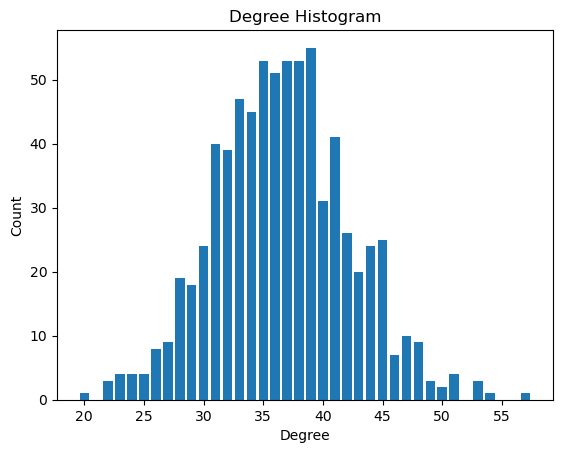

In [12]:
get_degree_count_distribution(graph1_equivalent_random)

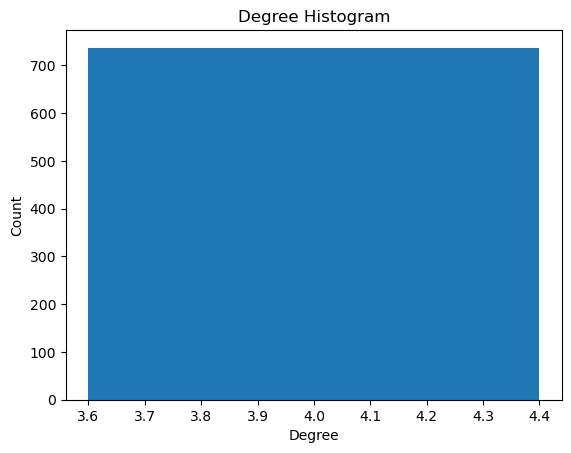

In [11]:
get_degree_count_distribution(graph1_equivalent_regular)

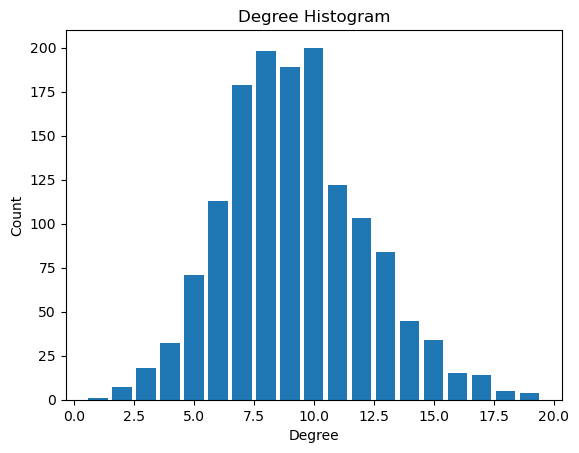

In [10]:
get_degree_count_distribution(graph2_equivalent_random)

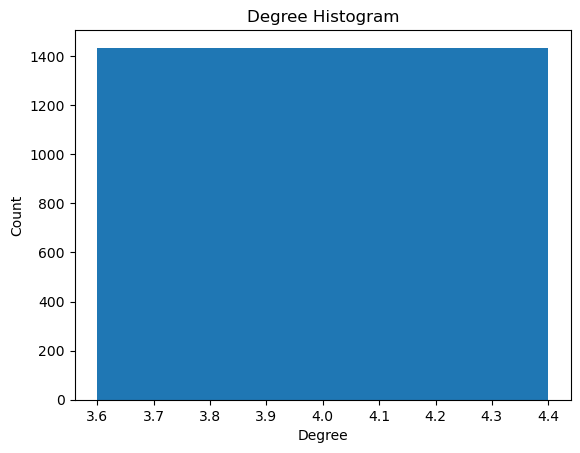

In [9]:
get_degree_count_distribution(graph2_equivalent_regular)

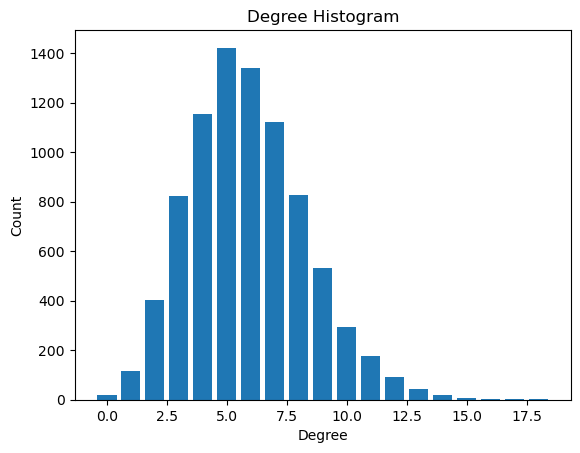

In [8]:
get_degree_count_distribution(graph3_equivalent_random)

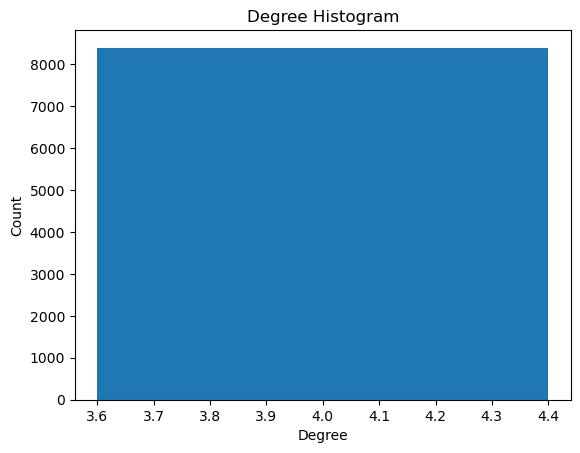

In [7]:
get_degree_count_distribution(graph3_equivalent_regular)

In [35]:

def print_node_level_comparison(graph:nx.Graph, equivalent_random:nx.Graph, equivalent_regular:nx.Graph):

    show_node_level_descriptors_degrees([graph, equivalent_random, equivalent_regular], ['graph', 'random', 'regular'])
    print('\n'*4)
    show_node_level_descriptors_clustering_centrality([graph, equivalent_random, equivalent_regular], ['graph', 'random', 'regular'])
    print('\n'*4)
    show_node_level_descriptors_closeness_centrality([graph, equivalent_random, equivalent_regular], ['graph', 'random', 'regular'])


Degrees


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell






Clustering Coefficient


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell






Closeness Centrality


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell

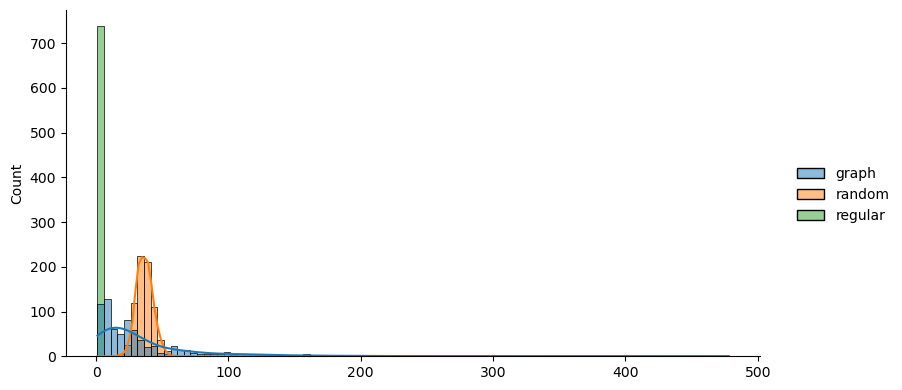

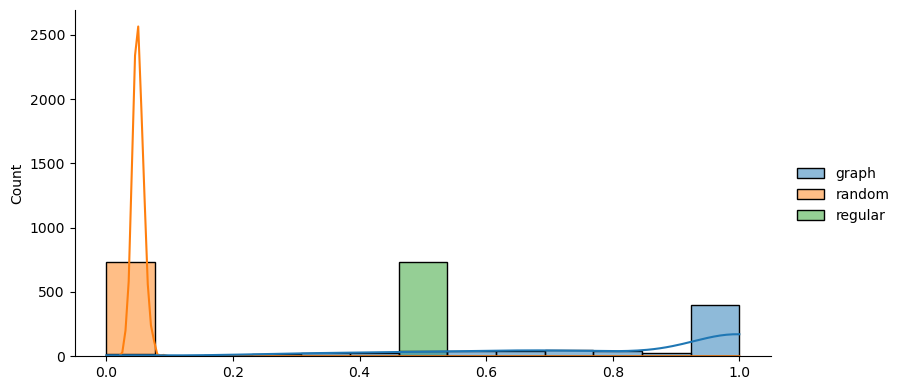

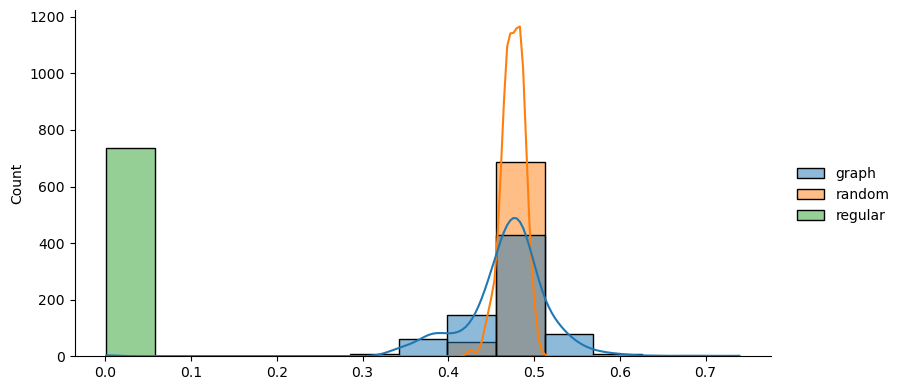

In [40]:
print_node_level_comparison(graph1, graph1_equivalent_random, graph1_equivalent_regular)

Degrees


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell






Clustering Coefficient


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell






Closeness Centrality


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell

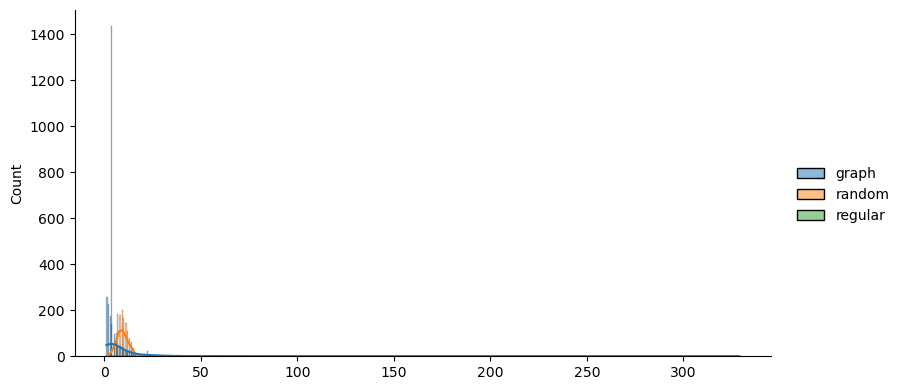

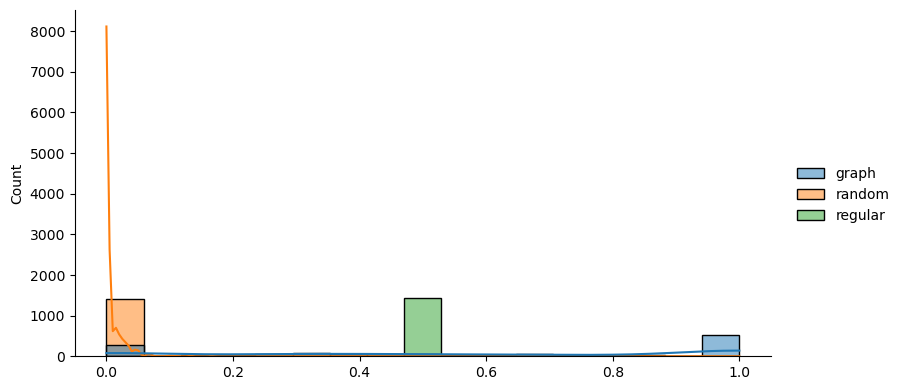

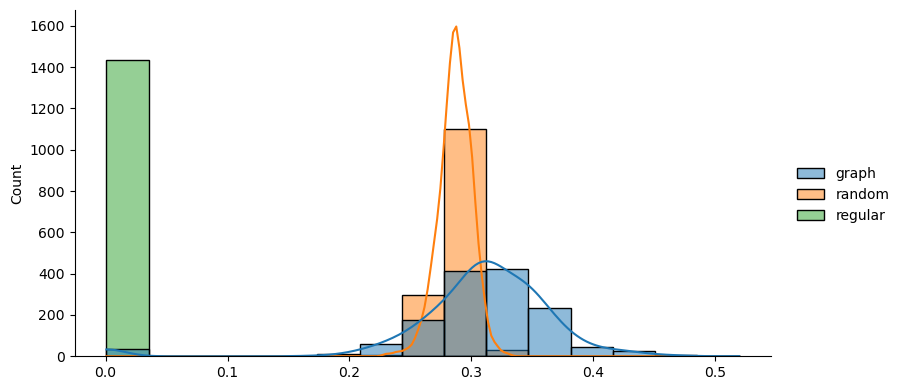

In [41]:
print_node_level_comparison(graph2, graph2_equivalent_random, graph2_equivalent_regular)

Degrees


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell






Clustering Coefficient


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell






Closeness Centrality


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell

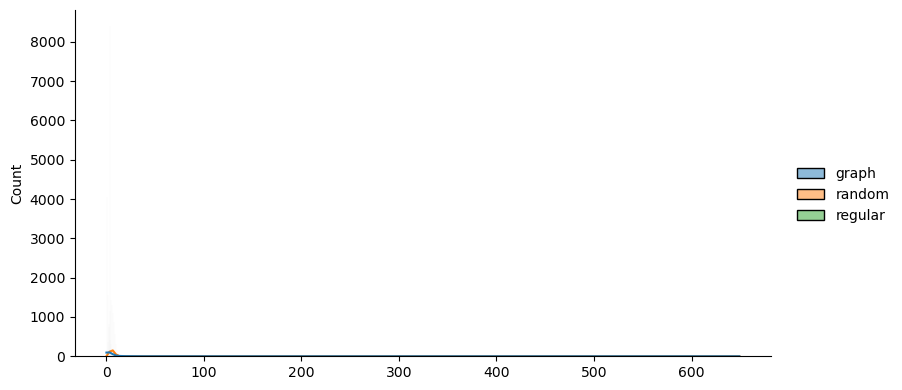

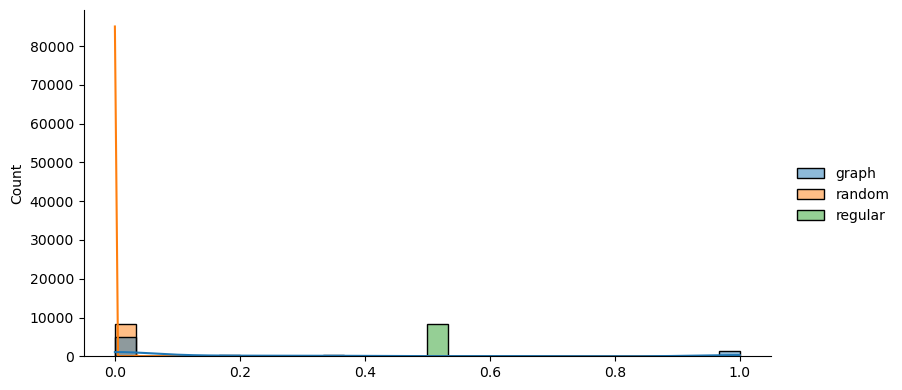

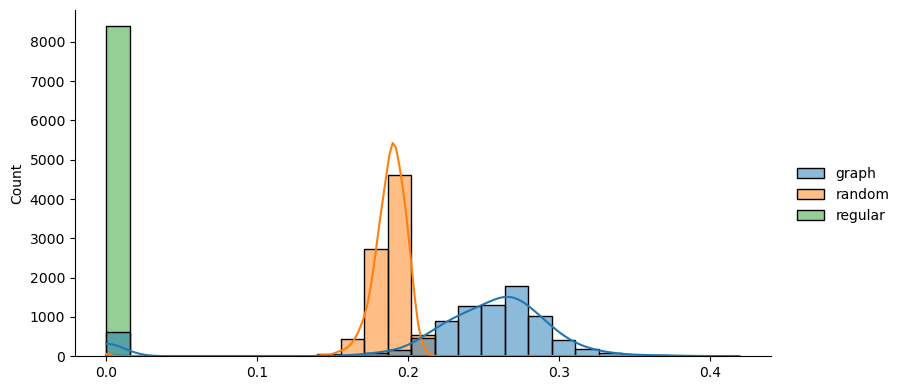

In [36]:
print_node_level_comparison(graph3, graph3_equivalent_random, graph3_equivalent_regular)

## v) Two editors are connected iff they have both contributed to any thread in the same page, but not necessarily to the same thread? ( I.e. we would have more connections in the network)

In [24]:
def create_graph_connected_by_thread_in_same_page(network_data:str):
    net = pd.read_csv(network_data)

    graph = nx.Graph()

    for page, dataframe in net.groupby('page_name'):
        nodes = dataframe['username'].unique()
        for i in range(len(nodes)):
            for j in range (i + 1, len(nodes)):
                graph.add_edge(nodes[i], nodes[j])

    return graph



#### - statistics
#### - statistics of largest comp
#### - node level stats
#### - shortest paths (largest comp)
#### - where on the regular <-> random network

In [25]:
net1 = create_graph_connected_by_thread_in_same_page('datasets/PROPERTIES_FOR_DELETION_SML.csv')
net2 = create_graph_connected_by_thread_in_same_page("datasets/WIKIPROJECTS_MED.csv")
net3 = create_graph_connected_by_thread_in_same_page("datasets/USERS_LRG.csv")

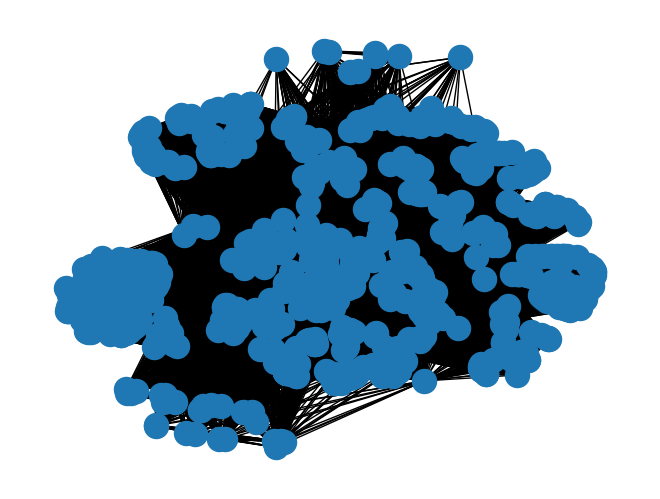

In [45]:
nx.draw(net1, with_labels = False)
plt.show()

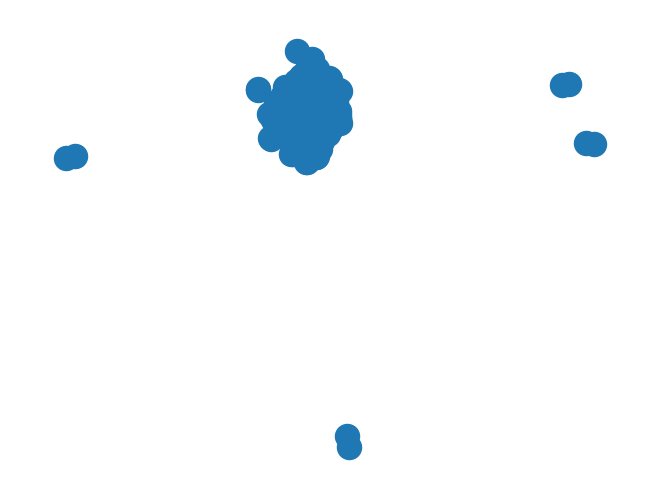

In [46]:
nx.draw(net2, with_labels = False)
plt.show()

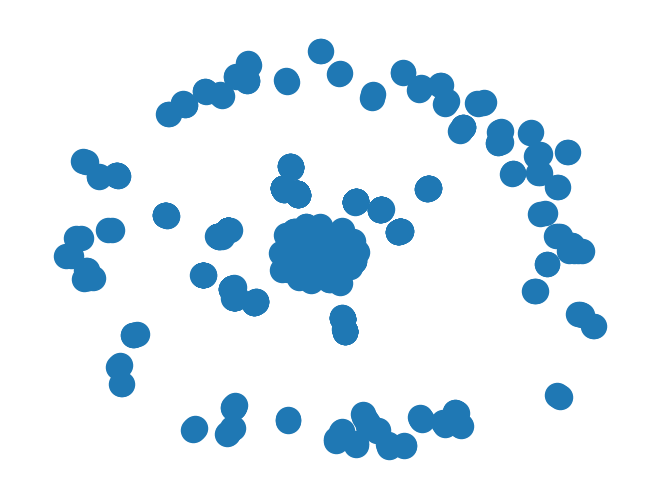

In [39]:
nx.draw(net3, with_labels = False)
plt.show()

In [ ]:
bokeh_plot_simple(net1, 'Net 1', 4)

In [ ]:
bokeh_plot_simple(net2, 'Net 2', 1)

In [ ]:
bokeh_plot_simple(net3, 'Net 3', 2)

In [26]:
# Statistics
print_graph_statistics(net1)

Number of nodes: 739
Number of edges: 85143
Number of connected components: 1


Average degree: 230.4276048714479
Clustering coefficient: 0.8663547306887533
Graph diameter: 2


In [27]:
print_graph_statistics(net2)

Number of nodes: 1597
Number of edges: 40318
Number of connected components: 5
Average degree: 50.492172824045085
Clustering coefficient: 0.8094406961443409

ERROR: Could not compute the diameter of the graph.


In [40]:
print_graph_statistics(net3)

Number of nodes: 10466
Number of edges: 373777
Number of connected components: 81


Average degree: 71.42690617236767
Clustering coefficient: 0.7604010978135624

ERROR: Could not compute the diameter of the graph.


In [29]:
# Statistics largest comp
print_statistics_for_largest_component(net1)

Number of nodes: 739
Number of edges: 85143
Average path length: 1.6877674730739187
Number of connected components: 1
Average degree: 230.4276048714479
Clustering coefficient: 0.8663547306887533
Graph diameter: 2


In [30]:
print_statistics_for_largest_component(net2)

Number of nodes: 1589
Number of edges: 40314
Average path length: 2.276115865847221
Number of connected components: 1
Average degree: 50.74134675896791
Clustering coefficient: 0.8135159167668423
Graph diameter: 6


In [41]:
print_statistics_for_largest_component(net3)

Number of nodes: 9948
Number of edges: 369364
Average path length: 2.588976925513828
Number of connected components: 1
Average degree: 74.25894652191396
Clustering coefficient: 0.7580442859251517
Graph diameter: 6


Degrees


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell

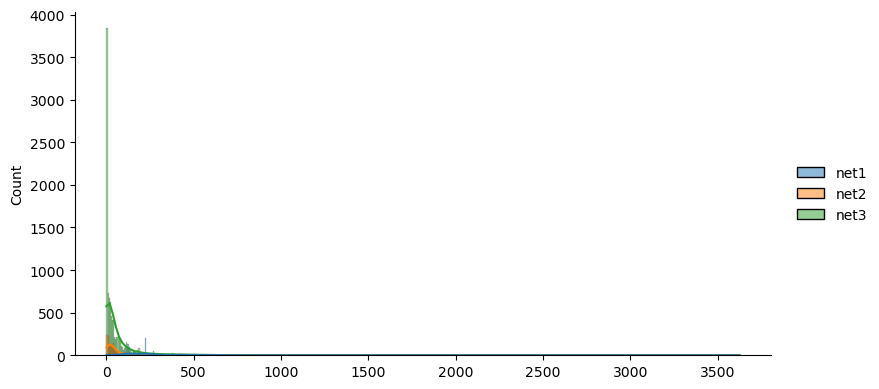

In [42]:
# node level stats
show_node_level_descriptors_degrees([net1, net2, net3], ['net1', 'net2', 'net3'])

Clustering Coefficient


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell

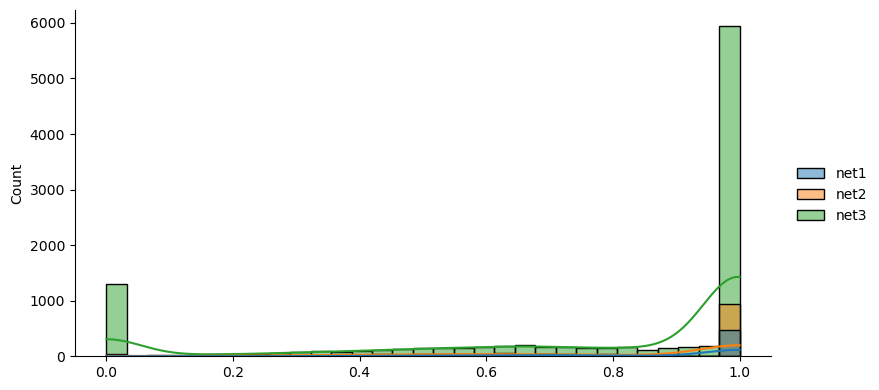

In [43]:
show_node_level_descriptors_clustering_centrality([net1, net2, net3], ['net1', 'net2', 'net3'])

Closeness Centrality


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell

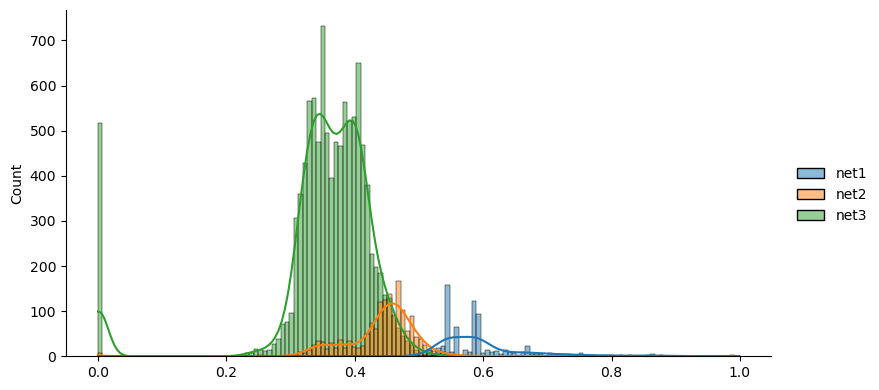

In [44]:
show_node_level_descriptors_closeness_centrality([net1, net2, net3], ['net1', 'net2', 'net3'])

In [45]:
# shortest paths

net1_largest_component = net1.subgraph(max(nx.connected_components(net1), key=len))

net2_largest_component = net2.subgraph(max(nx.connected_components(net2), key=len))

net3_largest_component = net3.subgraph(max(nx.connected_components(net3), key=len))

In [46]:
# Check to see if largest path is in largest component
print('Net 1:')
print(check_diam_is_in_component(net1, net1_largest_component))
print('\nNet 2: ')
print(check_diam_is_in_component(net2, net2_largest_component))
print('\nNet 3:')
print(check_diam_is_in_component(net3, net3_largest_component))

Net 1:
True

Net 2: 
True

Net 3:
True


In [47]:
net1_farthest_nodes  = get_farthest_nodes_efficient(net1_largest_component)

In [48]:
net2_farthest_nodes  = get_farthest_nodes_efficient(net2_largest_component)

In [49]:
net3_farthest_nodes  = get_farthest_nodes_efficient(net3_largest_component)

In [50]:
get_shortest_path_largest_component_Dijkstra(net1_largest_component, net1_farthest_nodes)


Shortest path: Cwf97 -> Mike Peel -> 2409:8902:9001:1F4F:1444:B367:16E3:3F84
How long is the path among these farthest nodes? 2
Should be the same as the diameter of the graph!!!: 2


In [51]:
get_shortest_path_largest_component_Dijkstra(net2_largest_component, net2_farthest_nodes)


Shortest path: Youyouca -> Fjjulien -> Beat Estermann -> Jura1 -> Papuass -> GAN -> EricSabell72
How long is the path among these farthest nodes? 6
Should be the same as the diameter of the graph!!!: 6


In [52]:
get_shortest_path_largest_component_Dijkstra(net3_largest_component, net3_farthest_nodes)


Shortest path: Dr.sese12 -> لوقا -> باسم -> Misibacsi -> Harmonia Amanda -> John Andersson (WMSE) -> Ammartivari
How long is the path among these farthest nodes? 6
Should be the same as the diameter of the graph!!!: 6


In [53]:
get_shortest_path_largest_component_BF(net1_largest_component, net1_farthest_nodes)

Start node: Cwf97
End node: 2409:8902:9001:1F4F:1444:B367:16E3:3F84

Shortest path: Cwf97 -> Mike Peel -> 2409:8902:9001:1F4F:1444:B367:16E3:3F84
How long is the path among these farthest nodes? 2
Should be the same as the diameter of the graph!!!: 2


In [54]:
get_shortest_path_largest_component_BF(net2_largest_component, net2_farthest_nodes)

Start node: Youyouca
End node: EricSabell72

Shortest path: Youyouca -> Fjjulien -> Beat Estermann -> Jura1 -> Papuass -> GAN -> EricSabell72
How long is the path among these farthest nodes? 6
Should be the same as the diameter of the graph!!!: 6


In [55]:
get_shortest_path_largest_component_BF(net3_largest_component, net3_farthest_nodes)

Start node: Dr.sese12
End node: Ammartivari

Shortest path: Dr.sese12 -> لوقا -> باسم -> Misibacsi -> Harmonia Amanda -> John Andersson (WMSE) -> Ammartivari
How long is the path among these farthest nodes? 6
Should be the same as the diameter of the graph!!!: 6


In [16]:
net1_equivalent_random = get_equivalent_random_graph(net1, False)
net2_equivalent_random = get_equivalent_random_graph(net2, False)
net3_equivalent_random = get_equivalent_random_graph(net3, False)

net1_equivalent_regular = get_equivalent_regular_graph(net1, False)
net2_equivalent_regular = get_equivalent_regular_graph(net2, False)
net3_equivalent_regular = get_equivalent_regular_graph(net3, False)

In [57]:
print_graph_statistics(net1_equivalent_random)
print('\n')
print_statistics_for_largest_component(net1_equivalent_random)
print('\n'*4)
print_statistics_for_largest_component(net1_equivalent_regular)

Number of nodes: 739
Number of edges: 85185
Number of connected components: 1
Average degree: 230.54127198917456
Clustering coefficient: 0.31227281967164405
Graph diameter: 2


Number of nodes: 739
Number of edges: 85185
Average path length: 1.6876134525891944
Number of connected components: 1
Average degree: 230.54127198917456
Clustering coefficient: 0.31227281967164405
Graph diameter: 2





Number of nodes: 739
Number of edges: 1478
Average path length: 92.75067750677506
Number of connected components: 1
Average degree: 4.0
Clustering coefficient: 0.5
Graph diameter: 185


In [58]:
print_graph_statistics(net2_equivalent_random)
print('\n')
print_statistics_for_largest_component(net2_equivalent_random)
print('\n'*4)
print_statistics_for_largest_component(net2_equivalent_regular)

Number of nodes: 1597
Number of edges: 40216
Number of connected components: 1
Average degree: 50.36443331246086
Clustering coefficient: 0.03154991902646717
Graph diameter: 3


Number of nodes: 1597
Number of edges: 40216
Average path length: 2.166310422267315
Number of connected components: 1
Average degree: 50.36443331246086
Clustering coefficient: 0.03154991902646717
Graph diameter: 3





Number of nodes: 1597
Number of edges: 3194
Average path length: 200.0
Number of connected components: 1
Average degree: 4.0
Clustering coefficient: 0.5
Graph diameter: 399


In [59]:
print_graph_statistics(net3_equivalent_random)
print('\n')
print_statistics_for_largest_component(net3_equivalent_random)
print('\n'*4)
print_statistics_for_largest_component(net3_equivalent_regular)

Number of nodes: 10466
Number of edges: 372929
Number of connected components: 1
Average degree: 71.26485763424422
Clustering coefficient: 0.006830384458095371
Graph diameter: 3


Number of nodes: 10466
Number of edges: 372929
Average path length: 2.6045375058809865
Number of connected components: 1
Average degree: 71.26485763424422
Clustering coefficient: 0.006830384458095371
Graph diameter: 3





Number of nodes: 10466
Number of edges: 20932
Average path length: 1308.6250358337315
Number of connected components: 1
Average degree: 4.0
Clustering coefficient: 0.5
Graph diameter: 2617


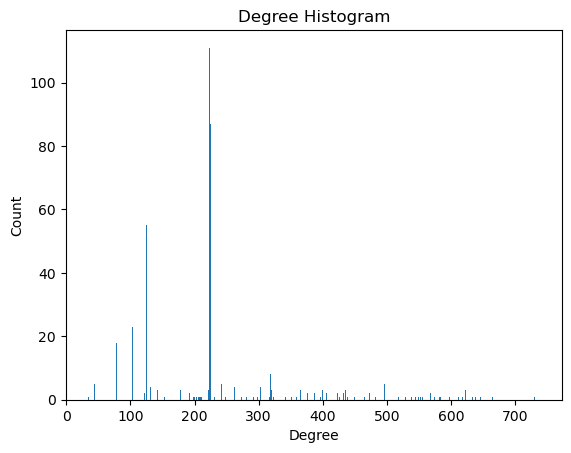

In [25]:
get_degree_count_distribution(net1)

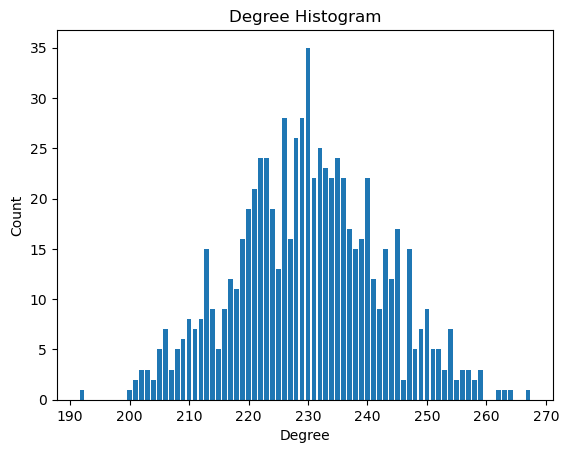

In [24]:
get_degree_count_distribution(net1_equivalent_random)

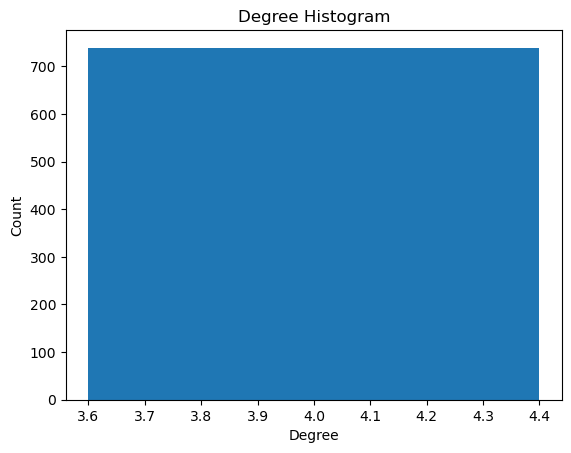

In [23]:
get_degree_count_distribution(net1_equivalent_regular)

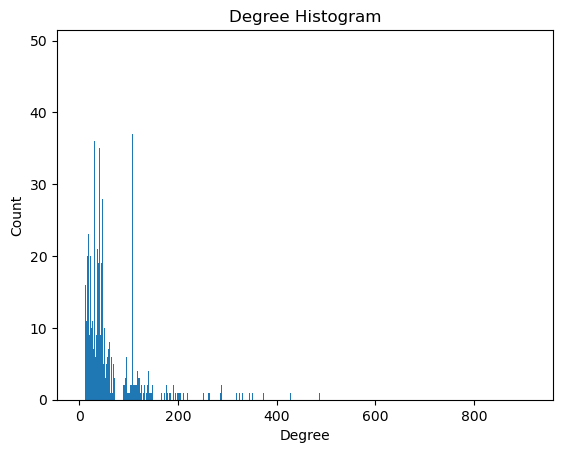

In [22]:
get_degree_count_distribution(net2)

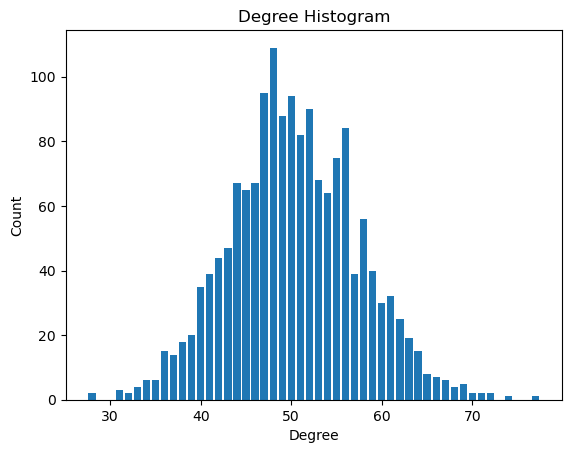

In [21]:
get_degree_count_distribution(net2_equivalent_random)

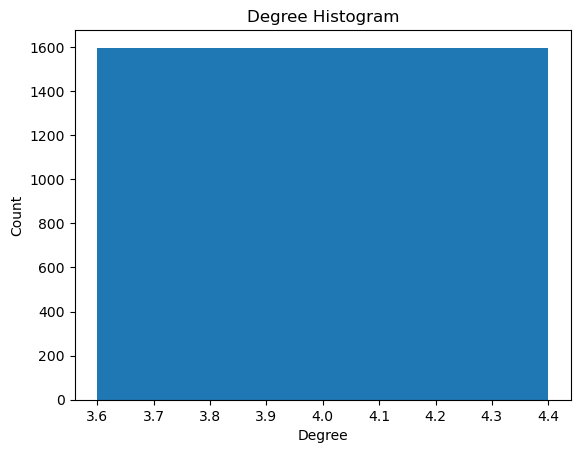

In [20]:
get_degree_count_distribution(net2_equivalent_regular)

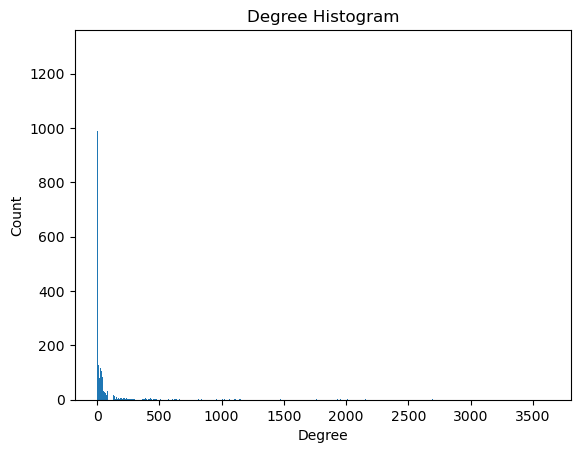

In [19]:
get_degree_count_distribution(net3)

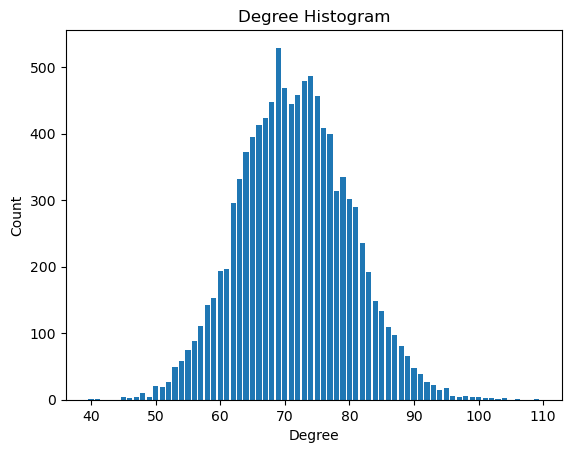

In [18]:
get_degree_count_distribution(net3_equivalent_random)

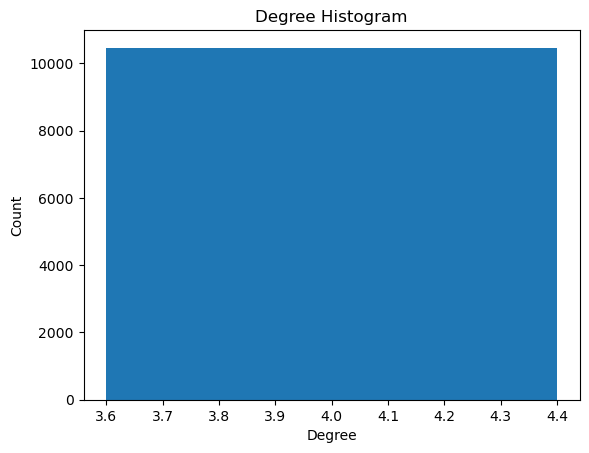

In [17]:
get_degree_count_distribution(net3_equivalent_regular)

Degrees


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell






Clustering Coefficient


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell






Closeness Centrality


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell

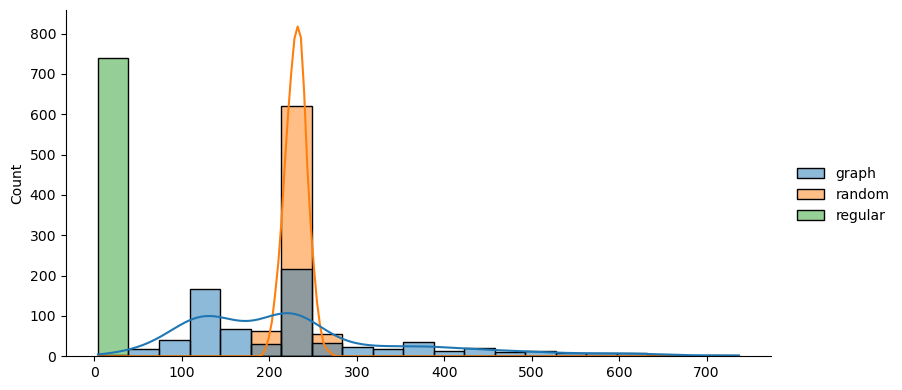

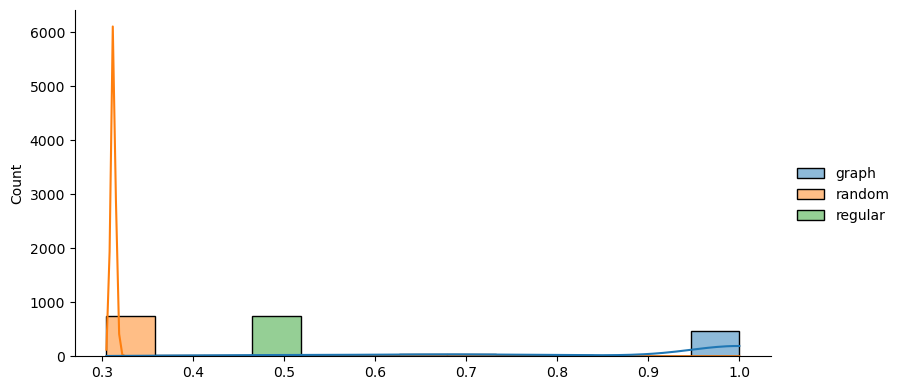

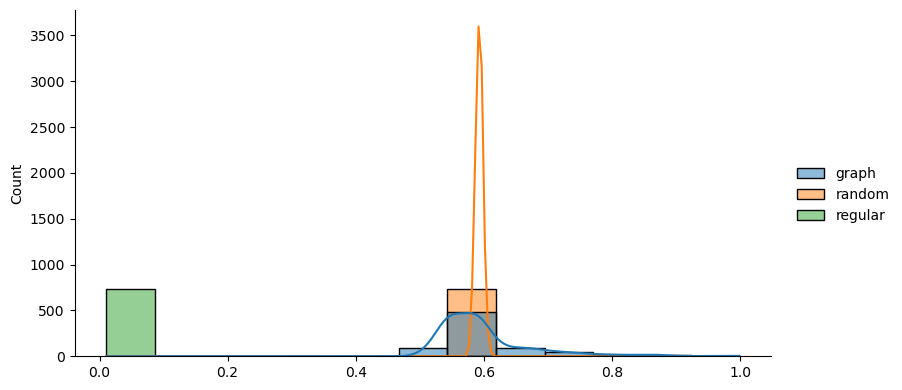

In [60]:
print_node_level_comparison(net1, net1_equivalent_random, net1_equivalent_regular)

Degrees


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell






Clustering Coefficient


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell






Closeness Centrality


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell

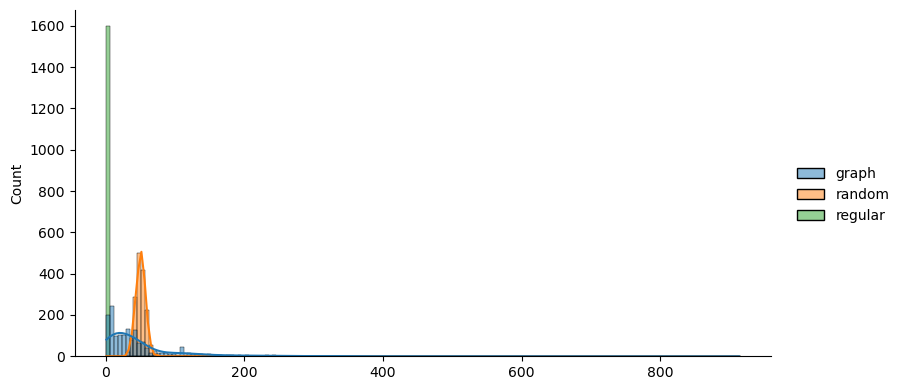

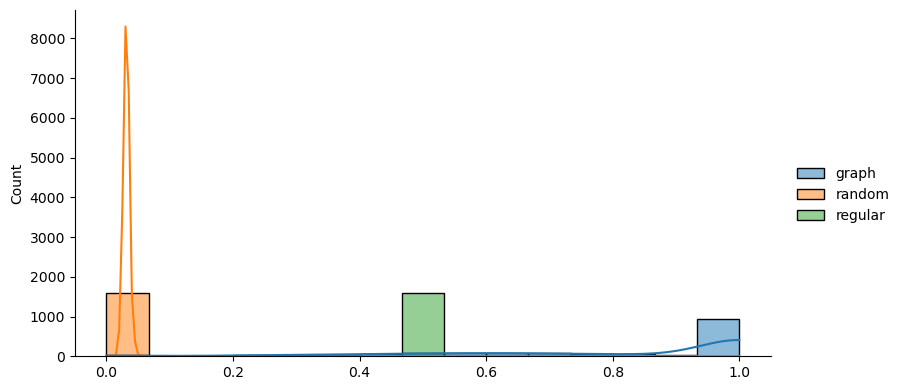

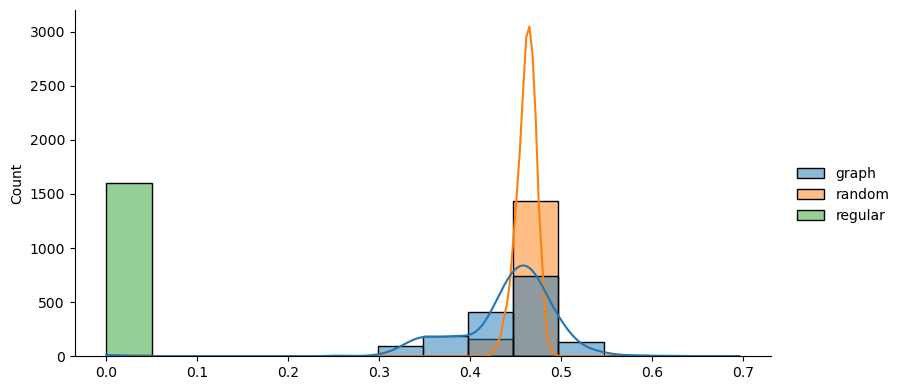

In [61]:
print_node_level_comparison(net2, net2_equivalent_random, net2_equivalent_regular)

Degrees


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell






Clustering Coefficient


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell






Closeness Centrality


/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kelly_tamargo/miniconda3/envs/nda/lib/python3.12/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/john_kell

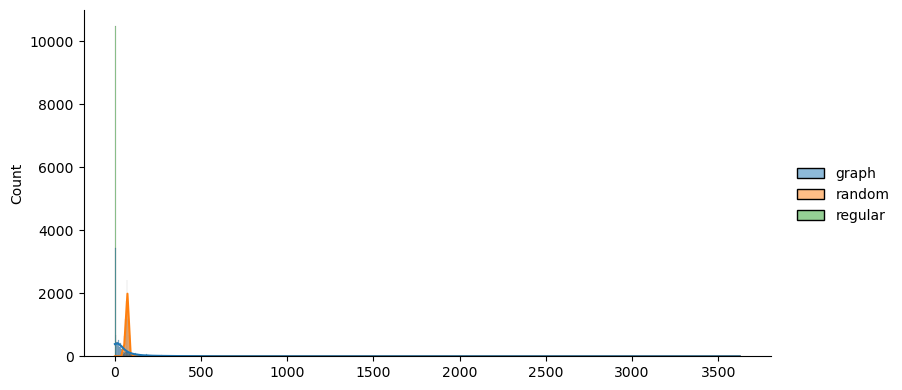

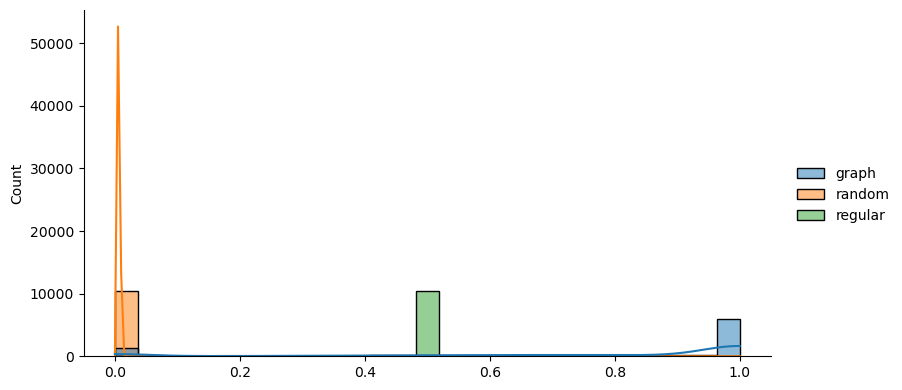

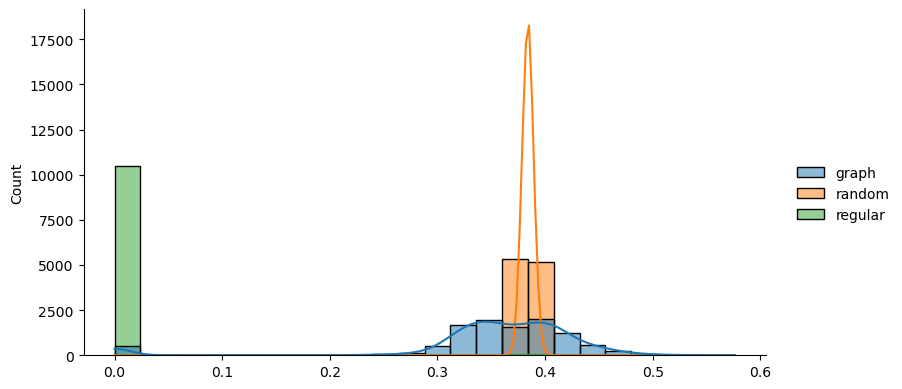

In [62]:
print_node_level_comparison(net3, net3_equivalent_random, net3_equivalent_regular)